<a href="https://colab.research.google.com/github/fengivan/382L-HW6/blob/main/HW6Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Delta X
0.04

Delta T
0.001

U
[0.5  0.52 0.54 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]
 
V
[3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416]
 


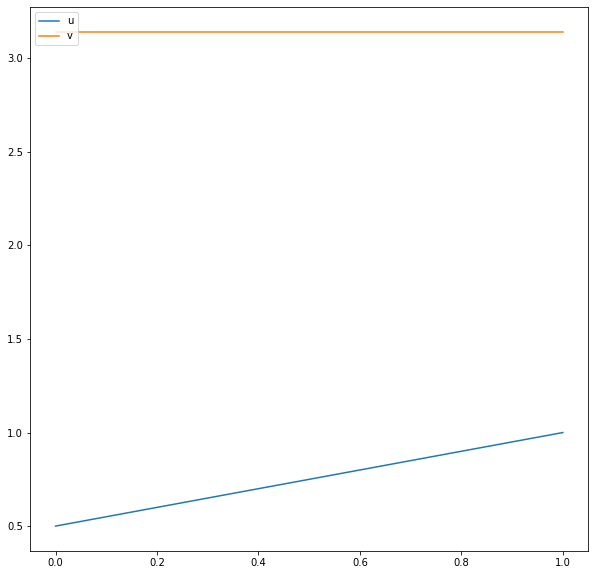

In [416]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=np.inf)
plt.rcParams['figure.figsize'] = [10, 10]

#initial conditions
size=26
deltax=1/(size-1)   #. 1/25
deltat=.001
u = np.zeros(size)
v = np.zeros(size)
for i in range(0,size):
  u[i]=((deltax*i+1)/2)
  v[i]=np.pi

print("Delta X")
print(deltax)
print("")
print("Delta T")
print(deltat)
print("")
print("U")
print(np.around((u),4))
print(" ")
print("V")
print(np.around((v),4))
print(" ")

x = np.linspace(0, 1, 26)
plt.plot( x,u, label="u")
plt.plot( x,v, label="v")
plt.legend(loc="upper left")
plt.show()

In [417]:
#builds the Jacobian Matrix of u and v
def buildJacobian(u,v, size):
  matrix=np.zeros((size*2,size*2))
  matrix[0][0]=1      #boundry conditions u0=.5, v0=pi; d/du0 and d/dv0 gives just 1                   
  matrix[1][1]=1
  for i in range(1,size):   #makes the banded matrix
    if i ==size-1:          #special boundary conditions at x=1
      matrix[i*2][i*2-2]=-1/deltax #df/du(i-1)
      matrix[i*2][i*2]= 1/deltax + np.cos(u[i]*v[i])*v[i] #df/du(i)
      matrix[i*2][i*2+1]= np.cos(u[i]*v[i])*u[i] #df/dv(i)
      matrix[i*2+1][i*2-1]= -1/deltax #df/dv(i-1)
      matrix[i*2+1][i*2]= np.sin(u[i]*v[i])*v[i] #df/du(i)
      matrix[i*2+1][i*2+1]= 1/deltax+np.sin(u[i]*v[i])*u[i] #df/dv(i)
    else:                   #differential terms
      matrix[i*2][i*2-2]=-(v[i]/deltax)**2+2*v[i]*(v[i]-v[i-1])/(deltax**2) #df/du(i-1)
      matrix[i*2][i*2-1]=(2*v[i]/deltax)*(u[i]-u[i-1])/deltax #df/dv(i-1)
      matrix[i*2][i*2]= 1/deltat+2*(v[i]/deltax)**2-2*(v[i]*(v[i]-v[i-1]))/(deltax**2) + v[i]-2*u[i] #df/du(i)
      matrix[i*2][i*2+1]= (-2*v[i]*(u[i+1]-2*u[i]+u[i-1])/(deltax**2))-4*v[i]*(u[i]-u[i-1])/deltax**2+2*v[i]*(u[i]-u[i-1])/deltax**2+u[i] #df/dv(i)
      matrix[i*2][i*2+2]=-(v[i]/deltax)**2   #df/du(i+1)
      matrix[i*2+1][i*2-2]=2*u[i]*(v[i]-v[i-1])/deltax**2 - 1/deltax**2#df/du(i-1)
      matrix[i*2+1][i*2-1]=-(u[i]/deltax)**2+2*u[i]*(u[i]-u[i-1])/deltax**2. #df/v(i-1)
      matrix[i*2+1][i*2]=-2*(v[i+1]-2*v[i]+v[i-1])*u[i]/deltax**2-4*u[i]*(v[i]-v[i-1])/(deltax**2)+2*u[i-1]*(v[i]-v[i-1])/deltax**2 + 2/deltax**2 - v[i] #df/du(i)
      matrix[i*2+1][i*2+1]=1/deltat+2*(u[i]/deltax)**2-2*u[i]*(u[i]-u[i-1])/deltax**2 -u[i]+2*v[i]#df/dv(i)
      matrix[i*2+1][i*2+2]= -1/deltax**2       #df/du(i+1)
      matrix[i*2+1][i*2+3]=-(u[i]/deltax)**2   #df/dv(i+1)
  return matrix

In [418]:
def buildB(u,v, size, uprev, vprev):    #builds the right hand side vector. uprev and vprev are the values of u and v at the n timestep, before iteration 
  b=np.zeros(size*2)                    
  b[0]=u[0]-.5                          #x=0 boundary
  b[1]=v[0]-np.pi
  for i in range(1,size-1):             #the given equations
    b[i*2]=  (u[i]-uprev[i])/deltat-v[i]**2*(u[i+1]-2*u[i]+u[i-1])/deltax**2 - 2*v[i]*(v[i]-v[i-1])*(u[i]-u[i-1])/deltax**2 +u[i]*v[i]-u[i]**2 -10
    b[i*2+1]=(v[i]-vprev[i])/deltat-u[i]**2*(v[i+1]-2*v[i]+v[i-1])/deltax**2 - 2*u[i]*(u[i]-u[i-1])*(v[i]-v[i-1])/deltax**2 -u[i]*v[i]+v[i]**2 - (u[i+1]-2*u[i]+u[i-1])/deltax**2
  #x=1 boundry
  b[size*2-2]=(u[size-1]-u[size-2])/deltax + np.sin(u[size-1]*v[size-1])-1/2
  b[size*2-1]=(v[size-1]-v[size-2])/deltax - np.cos(u[size-1]*v[size-1])-1
  return b

Time
0.10000000000000007

U
[0.5    0.5587 0.622  0.6883 0.756  0.8238 0.8907 0.956  1.0193 1.08   1.1381 1.1933 1.2457 1.2951 1.3417 1.3855 1.4265 1.4648 1.5006 1.5339 1.5649 1.5936 1.6201 1.6447 1.6673 1.6881]
 
V
[3.1416 2.9832 2.8787 2.8126 2.7743 2.7562 2.7534 2.762  2.7795 2.8041 2.8345 2.8698 2.9094 2.9526 2.9993 3.0492 3.102  3.1578 3.2165 3.278  3.3424 3.4097 3.4801 3.5535 3.6302 3.7102]
 


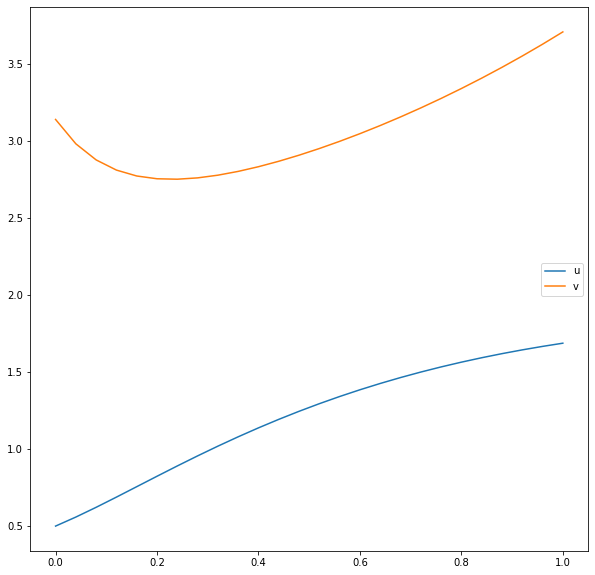

In [419]:
time=0

for t in range(0,100):
  time=time+deltat
  uprev=np.copy(u)    #keep track of u and v before itereation (u and v at the n time level)
  vprev=np.copy(v)

  for iter in range(0, 50):   #max iterations is 50
    delta=np.linalg.solve(buildJacobian(u,v,size), buildB(u,v,size,uprev,vprev))        #solve for the delta for each u and v 

    for i in range(0,size):     #subtract the delta from each u and v
      u[i]=u[i]-delta[i*2]
      v[i]=v[i]-delta[i*2+1]

    u[0]=.5         #continue enforcing boundary conditions
    v[0]=np.pi

    if np.linalg.norm(delta)<10**-10:     #if the norm of delta is very small, no need to continue iterating
      break

print("Time")
print(time)
print("")
print("U")
print(np.around((u),4))
print(" ")
print("V")
print(np.around((v),4))
print(" ")

x = np.linspace(0, 1, size)
plt.plot( x,u, label="u")
plt.plot( x,v, label="v")
plt.legend(loc="right")
plt.show()